(sec:pdf_estimation_missing_data)=
# Incorporating information from the missingness mechanisms 

TODO: Write theory


In [21]:
# import pre-installed packages and init. 
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys 
from myst_nb import glue

# add tools path and import our own tools
sys.path.insert(0, '../tools')
%load_ext autoreload
%autoreload 2
mpl.rcParams.update({'font.size': 14})

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
def fi(x=12, y=12):
    return plt.figure(figsize=(x, y))

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2D Dataset generation 

## Missing Completely at Random (MCAR)

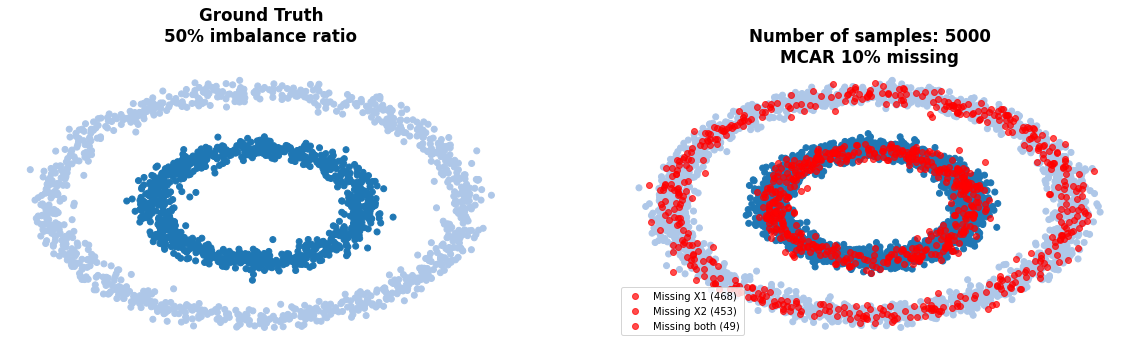

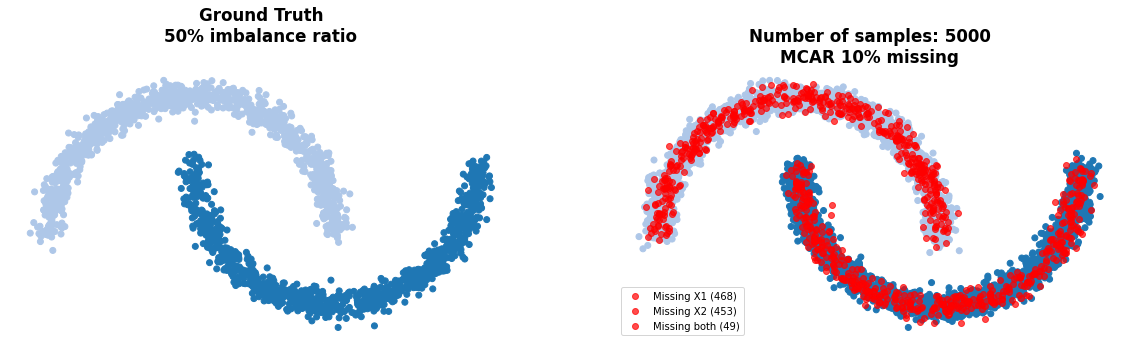

In [11]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MCAR', missing_one_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

dataset = DatasetGenerator(name='moons', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MCAR', missing_one_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

## Missing at Random (MAR)

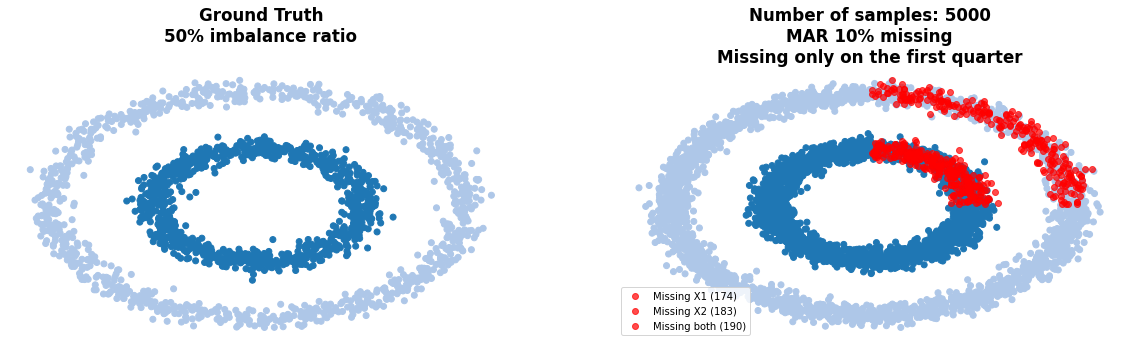

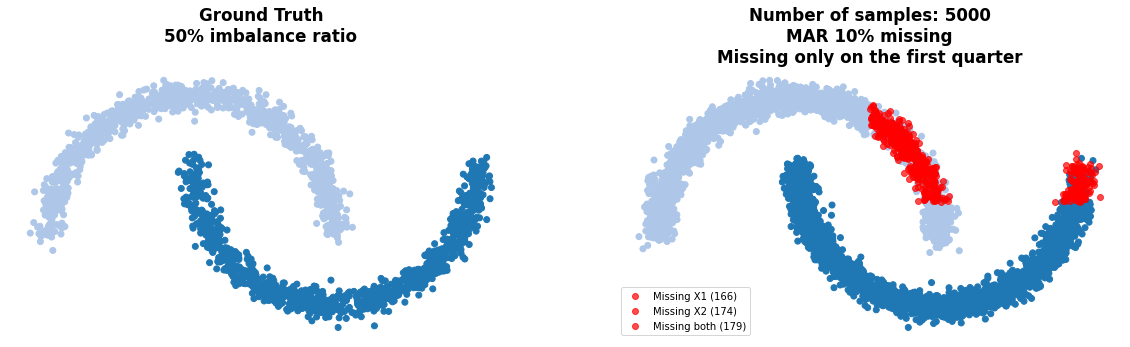

In [12]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', missing_one_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

dataset = DatasetGenerator(name='moons', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', missing_one_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

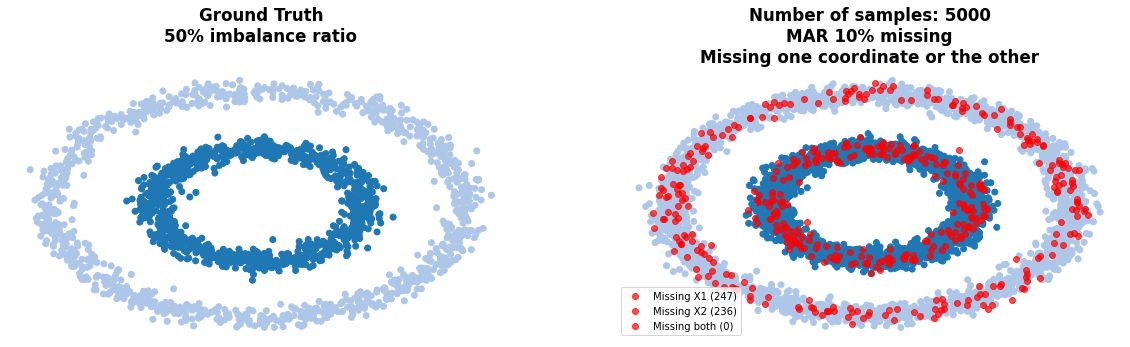

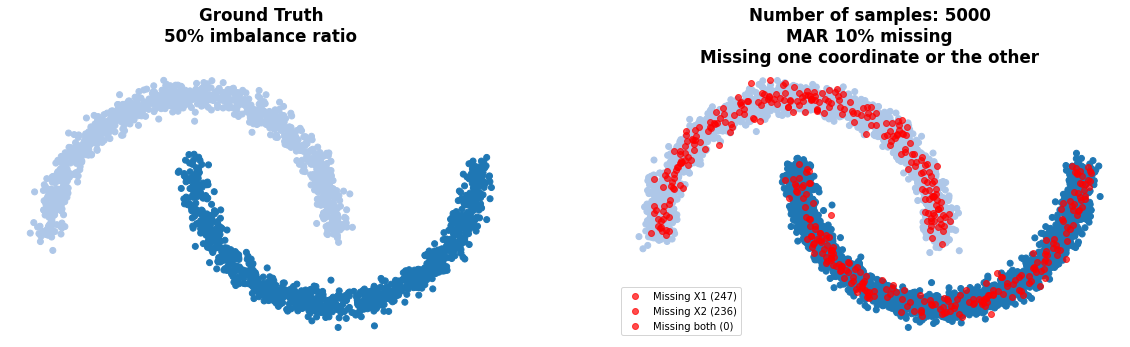

In [14]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', missing_one_coordinates=True, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

dataset = DatasetGenerator(name='moons', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MAR', missing_one_coordinates=True, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

## Missing Not at Random (MNAR)

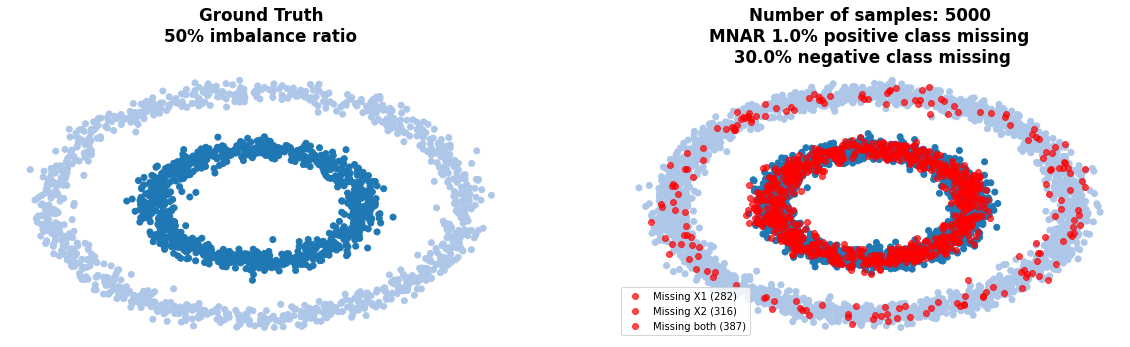

In [36]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', missing_one_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.01, .3])
dataset.plot(verbosity=1)


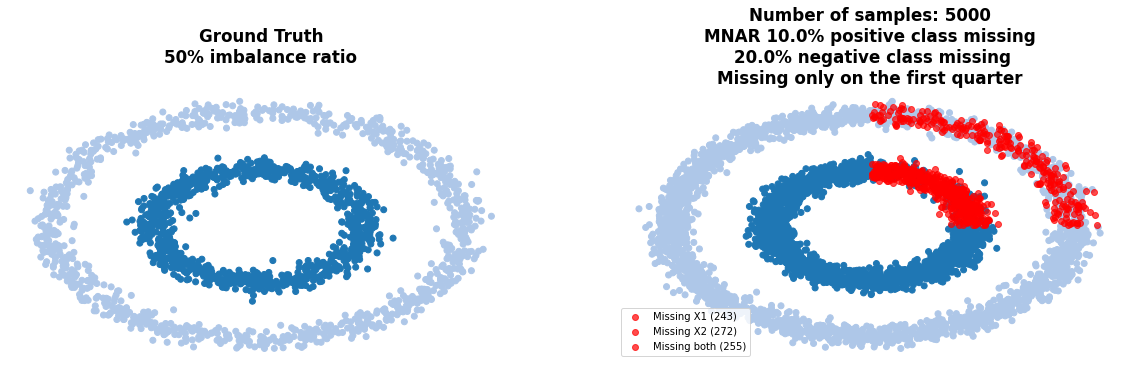

In [40]:
from generateToyDataset import DatasetGenerator

dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', missing_one_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
dataset.plot(verbosity=1)

In [42]:
dataset = DatasetGenerator(name='circles', num_samples=5000, ratio_of_missing_values=.1, imbalance_ratio=.5, num_samples_gt=2000, verbosity=1, random_state=47)
dataset.generate_missing_coordinates(missingness_mechanism='MNAR', missing_one_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
X, X_gt, y, y_gt = dataset.get_data()

# Estimation of Q

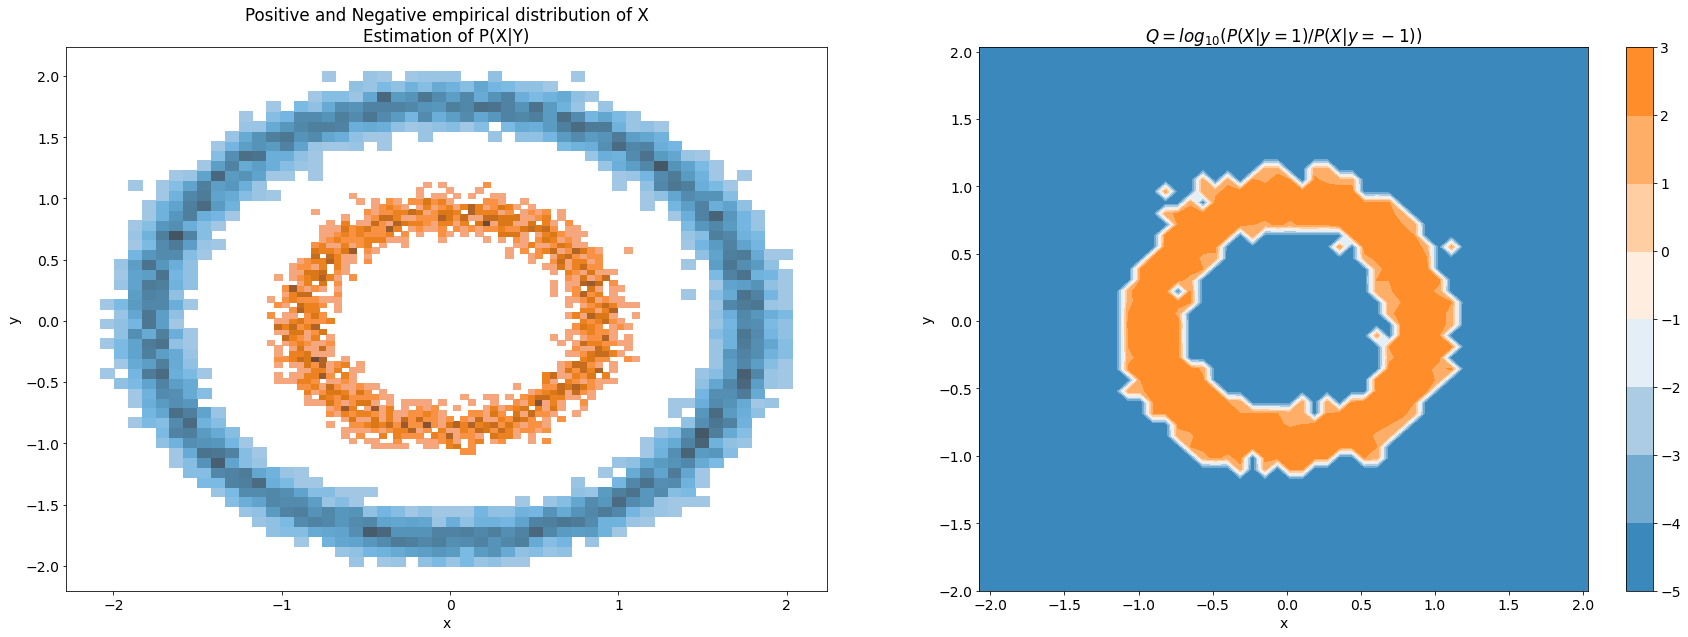

In [4]:
from stats import feature_values_positive_to_negative_ratio
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                                          num_samples=10000, 
                                          ratio_of_missing_values=0,#ratio_of_missing_values, 
                                          imbalance_ratio=imbalance_ratio,
                                          provide_labels=True, 
                                          verbose=False)
Xp = X[np.argwhere(Y==1).squeeze()]; Xn = X[np.argwhere(Y==0).squeeze()]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, num_bins=50)

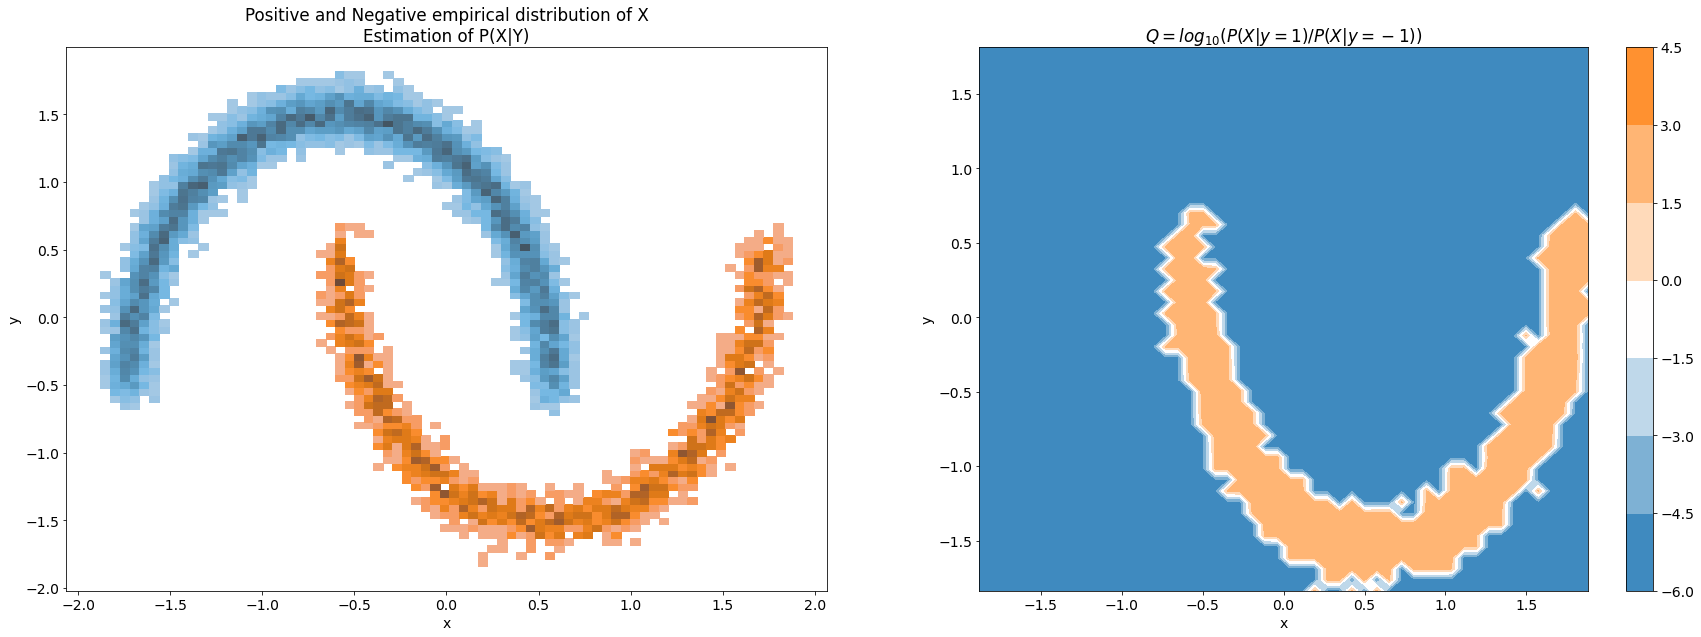

In [5]:
from stats import feature_values_positive_to_negative_ratio
X, Xgt, Y, Ygt = create_dataset(name="moons", 
                                          num_samples=10000, 
                                          ratio_of_missing_values=0, 
                                          imbalance_ratio=imbalance_ratio,
                                          provide_labels=True, 
                                          verbose=False)
Xp = X[np.argwhere(Y==1).squeeze()]; Xn = X[np.argwhere(Y==0).squeeze()]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, num_bins=50)

# Comparing imputation methods and the approach using missing variables mechanisms

**Generating the data**

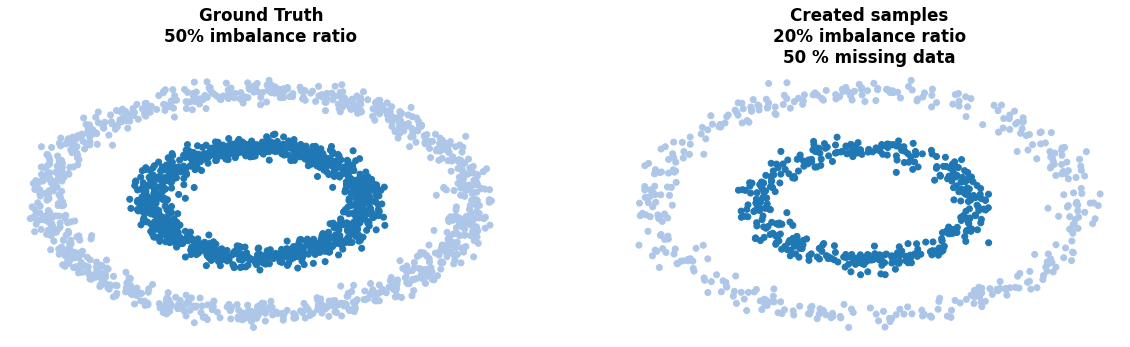

In [6]:
ratio_of_missing_values = 0.2
imbalance_ratio = .5

# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=1000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=True)

## Missing error method

**The method `missing_error` aims fills a whole line (with the prior on the missingness) when a coordinate for `X_i` is missing.**

**Conclusion of this method:**

    * As we can see it put some weight in area of the space that should be empty, increasing the reconstruction error.

1000 samples created


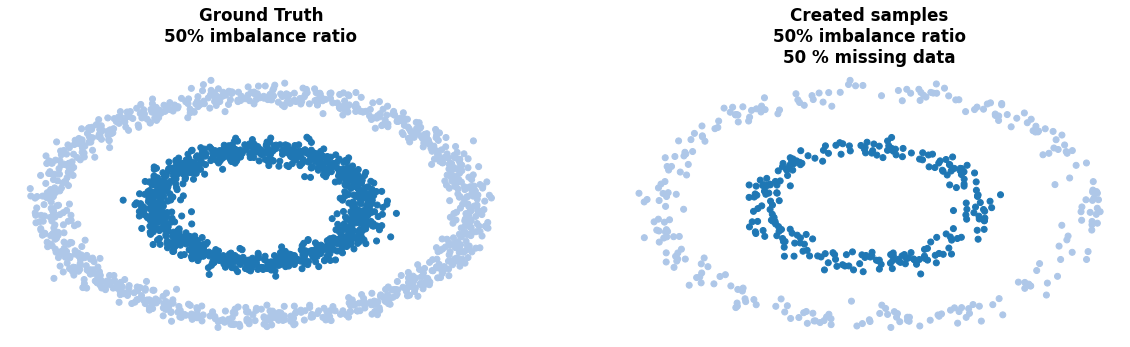

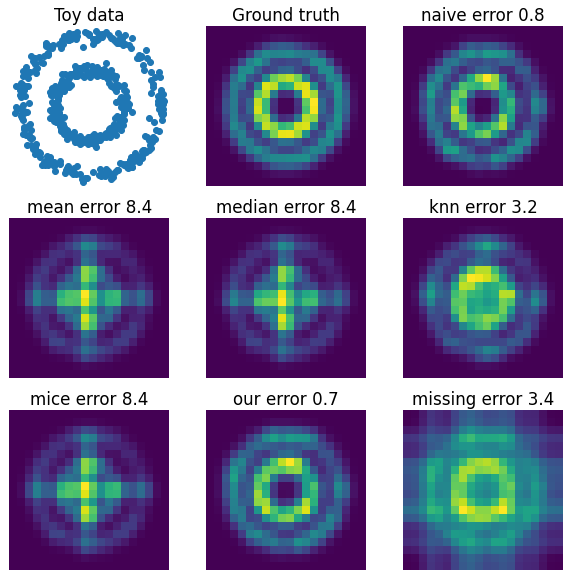

In [14]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.5,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2)

## Missing error with limited range method
**The method `missing_error_limited_range` does not fill the whole line (with the prior on the missingness) when a coordinate of `X_i` is missing, but only the "explored" areas of the feature space. To do that, we first need to compute a mask on the domain to indicate where on the feature space we can put weight.**

**Conclusion:**

    * As we can see it solved the problem of putting mass on empty parts of the feature space, but create discrete artifacts on the reconstructed distribution. This has to be explored, but the first explannation that comes to mind (and looking at the space mask), is that it binarize too much the feature space, allowing to put mass on some squares but not on neighbors one... Increasing the resolution of the feature space might partially solve the problem.

1000 samples created


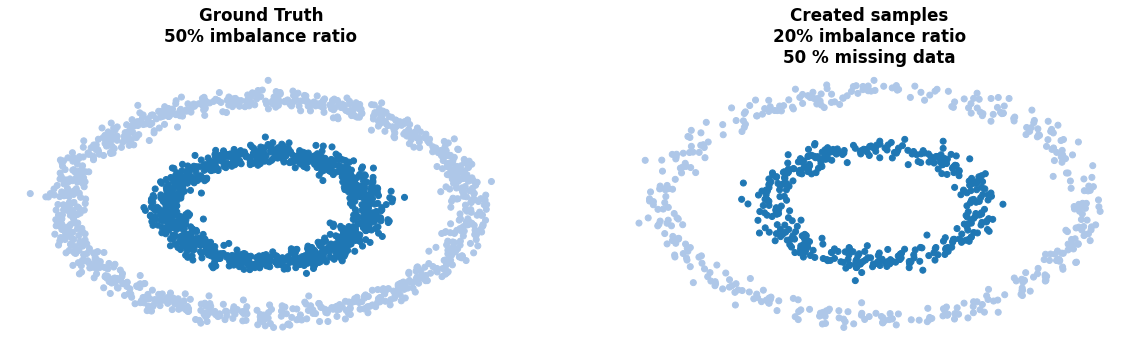

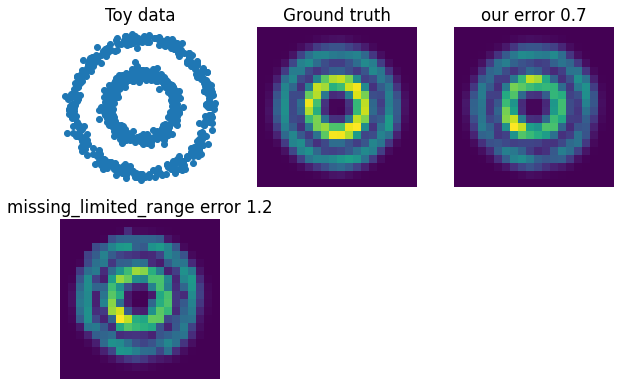

In [169]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.2,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2, 
                               resolution=50,
                               methods=['our', "missing_limited_range"])

**Here we increase the resolution of the feature space from `20` to `50`.**


**Conclusion:**

    * Although increasing the resolution goes towards reducing the phenomenom 

1000 samples created


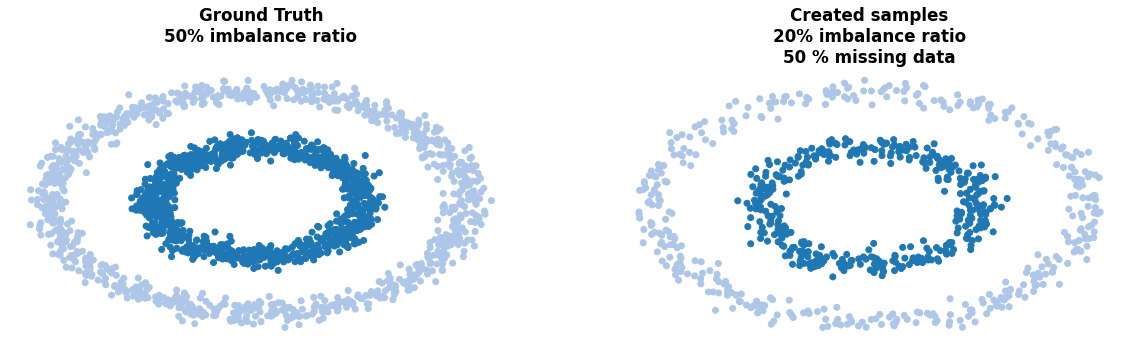

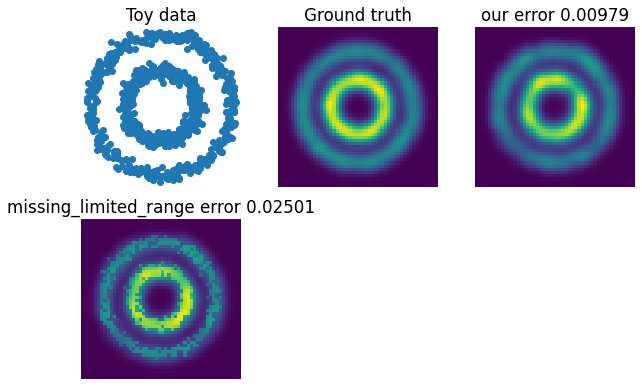

In [174]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.2,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2, 
                               resolution=50,
                               methods=['our', "missing_limited_range"])

<AxesSubplot:>

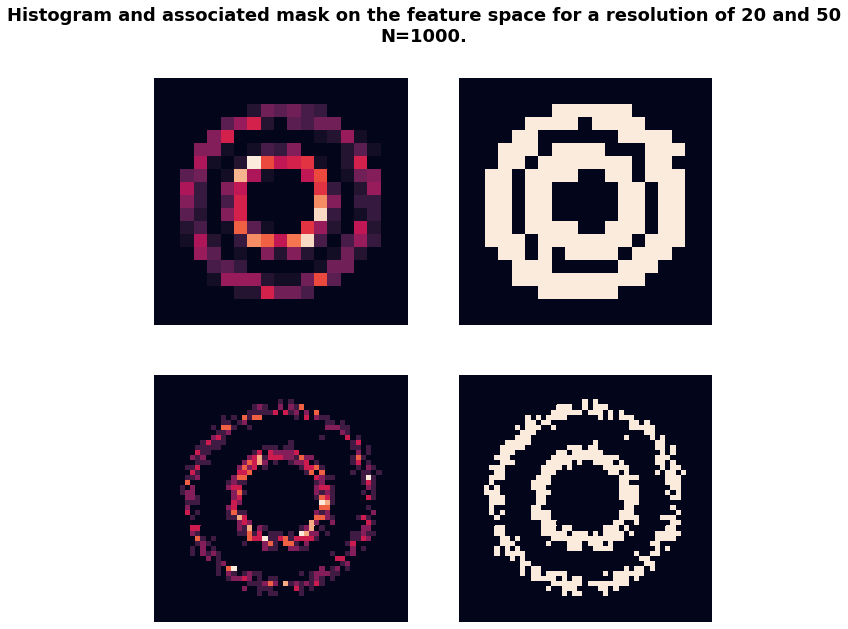

In [193]:
# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=1000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10)); axes = axes.flatten()
fig.suptitle("Histogram and associated mask on the feature space for a resolution of 20 and 50\nN=1000.", weight='bold', fontsize=18);[ax.axis('off') for ax in axes] 
resolution = 20
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[0], cbar=False); sns.heatmap(hist2d>0, ax=axes[1], cbar=False)
resolution = 50
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[2], cbar=False); sns.heatmap(hist2d>0, ax=axes[3], cbar=False)

<AxesSubplot:>

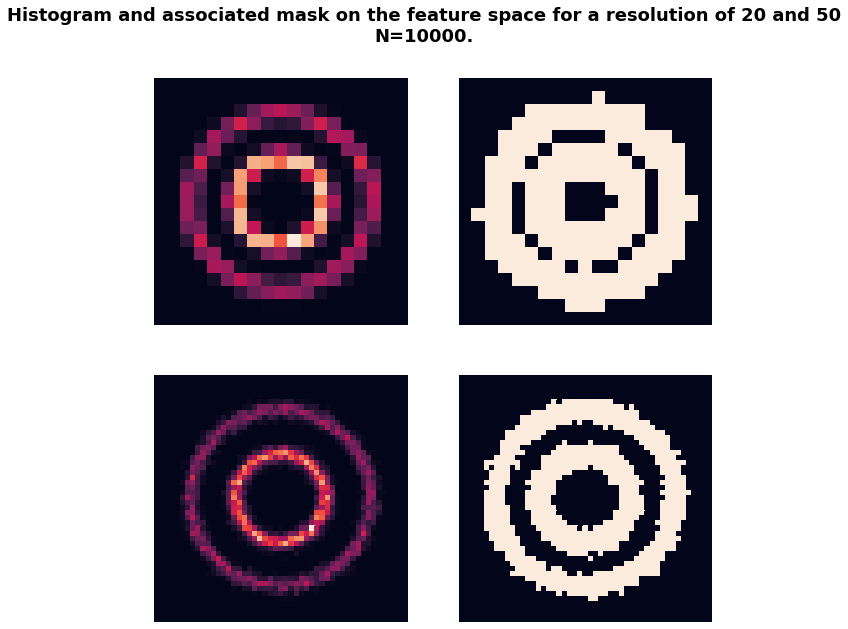

In [194]:
# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=10000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10)); axes = axes.flatten()
fig.suptitle("Histogram and associated mask on the feature space for a resolution of 20 and 50\nN=10000.", weight='bold', fontsize=18);[ax.axis('off') for ax in axes] 
resolution = 20
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[0], cbar=False); sns.heatmap(hist2d>0, ax=axes[1], cbar=False)
resolution = 50
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[2], cbar=False); sns.heatmap(hist2d>0, ax=axes[3], cbar=False)

#### Functions

In [191]:
xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f = np.zeros_like(xygrid[0])  # init. the pdf estimation

if method=='missing_limited_range':
    # See documentation
    from stats import kernel_based_pdf_estimation_z_prior_limited_range
    h = bandwidth

    # Compute the space mask to be sure not to add contribution on expty space, based on the resolution of the space
    m = [not np.isnan(np.sum(data[i,:])) for i in range(data.shape[0])]
    X_prior = data[m,:]
    hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
    hist2d_up = np.concatenate([np.concatenate([hist2d, np.zeros((1, W-1))], axis=0), np.zeros((H, 1))], axis=1)
    mask_space = hist2d_up>0
    for i in range(H):
        for j in range(W):
            x = xygrid[0][i,j]
            y = xygrid[1][i,j]
            hat_f[i,j] = kernel_based_pdf_estimation_z_prior_limited_range(data,x=[x,y], put_weight=mask_space[i,j], h=h)  

##############################################################################
####### Kernel_based_pdf_estimation_with_missing_priors_limited_range#########
##############################################################################

def kernel_based_pdf_estimation_z_prior_limited_range(X, x=None, h=.2, put_weight=1, verbose=0):
    """
    Estimate the pdf distribution of "X" at "x" using the set of observations X[i,:]. x has lenght k (the dimension of the problem), X has shape nxk (n observations of dimension k). 
    X can have missing values which should be filled with np.nan. A Kernel approximation is computed when the coordinates of the observations are know. 
    If a coordinate is unknown, the contribution of this term is replaced by a prior on the missingness distribution of that coordinate, computed from all the other samples. *The contribution is limited to the range of values, based on the rest of the dataset.*
    
    Example: 
    X = np.random.random((10,3))  # 10 Observations of a 3d problem
    X[0,1] = np.nan; X[4,2] = np.nan  # We don't know some entries. 
    h = .1  # bandwidth of the gaussian kernel
    x = [0.1, 0.1, 0.1]  # where we want to evaluate the pdf (in the 3d space)
    pdf_x = kernel_based_pdf_estimation_z_prior_limited_range(X,x=x,h=h,verbose=0)
    print('The prob at {} is {}.format(x,pdf_x))

    """

    # Computation of the missingness priors: [P(Z_1 = 1), ... ,  P(Z_K = 1)]
    Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])
    hat_f = F_z_prior_limited_range(X=X, Z_prior=Z_prior, put_weight=put_weight, x=x, h=h)
    return hat_f


#@jit(nopython=True, parallel=True)
def F_z_prior_limited_range(X=None, Z_prior=None, x=None, put_weight=0,  h=.2, verbose=0):
    """
    Computation of the pdf at x, using the prior on the missingness meachanism of each features. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    # number "training" samples 
    n = X.shape[0]      

    # init 
    hat_f = []  

    # Compute contribution of each samples to the estimation of the pdf at point x 
    for X_i in X:
        hat_f.append(f_xi_z_prior_limited_range(X_i, x, Z_prior, put_weight, h))
    hat_f = np.mean(np.array(hat_f))         
    return hat_f

#@jit(nopython=True, parallel=True)
def f_xi_z_prior_limited_range(X_i, x, Z_prior, put_weight, h):
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = Z_prior.shape[0]  # dimension of the space of samples. 
    K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel

    # Since we are using a isomorph kernel, each axis can be handeled independently. 
    hat_fi = 1
    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/h * K( (x[j]-X_i[j])/h )

        if coords_missing[j]:  # we don't know the j-th coordinate, 
            if put_weight: # We put weight only if this part of the space is explored by the distribution.
                # We use prior on the missingness mechanism associated to this coordinates.
                hat_fi *= Z_prior[j]
            else:
                hat_fi *= 0
    return hat_fi

## Construction of the distributions with Z


1) We can reasonably say that the estimation of X doing imputation has reached its optimum, in the sense that it might be hard to build a better approximation of $f_{X_{i}}$ than what Matias proposed. 

2) Now, the goal is to explore the estimation of the $Z$ variable, that is associated with the missingness mechanism. we can investigate two kind of distributions related to Z, either the distribution of $f_{Z}$, living on $\{0,1\}^k$ when it states about the absence or presence of the coordinates $X_i$ of $X$ in the dataset, or the distributions $f_{Z|X}$ on  $X(\Omega)^k$, which informs about where in the feature space the coordinates of $X$ has the higher chance to be missing. 

3) The distributions $f_{Z|X}$ helps to answer the following questions for instance: does $X_1$ is missing more for low values of $X_1$ ? for low values of $X_2$ ? In other words, it helps at inference time in the following way: if $X_1$ is missing, and $X_2$ is known and has a certain value, maybe there is 100% chance that the value of $X_1$ would be in some regions of the feature space. 

4) In the future, the same work will be done taking into account the class, so that the diagnosis $Y$ can be taken into account and we might leverage some missingness information, in the case of MNAR mechanisms.


**Now the idea is to add to the "side" distributions, (or $P(X_1|Z)$)) when a coordinate is missing. The method is called `side_spaces`.**

In other words, when a coordinate is missing, let's say $x_1$, then the contribution of this sample is used to build the marginal of $x_2$, which is denoted as a "side space".



We just computed the distributions of the features knowing whether the data were missing or not:

$$P(X_2|Z_1)\qquad \text{and}\qquad P(X_1|Z_2),$$ 

Let's now compute the distribution of the missingness variables $Z_1$ and $Z_2$ in function of the feature themselves. This allows for instance to better understand in which regions of the feature space of $X_1$ and $X_2$ we have the more chance to miss a featur (MAR mechanism and MNAR mechanism). 

By applying the Bayes's Rule: 


\begin{align}
  P(Z_1=0|X_2)  &= \text{Probability that X1 is missing looking at X2 feature space} \\
              &= \tfrac{P(X_2|Z_1=0)P(Z_1=0)}{P(X_2)} \\
             &= \tfrac{P(X_2|Z_1=0)P(Z_1=0)}{P(X_2|Z_1=0)P(Z_1=0) + P(X_2|Z_1=1)P(Z_1=1)} 
\end{align}

We can recognize the Bernouilli probability that indicate the prior on the missingness, $P(Z_1)$, the side distribution computed above, based on the data for which one coordinate is unknown (e.g. $P(X_2|Z_1=0)$), and the marginal distribution of $X_2$, $P(X_2|Z_1=1)$.

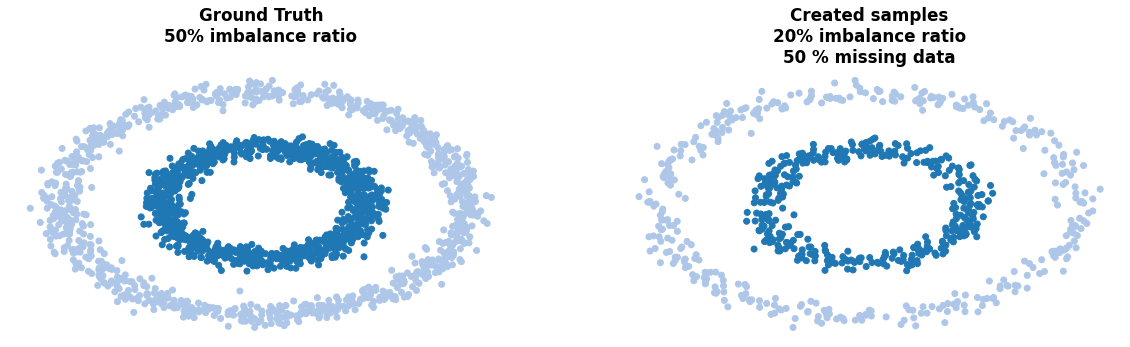

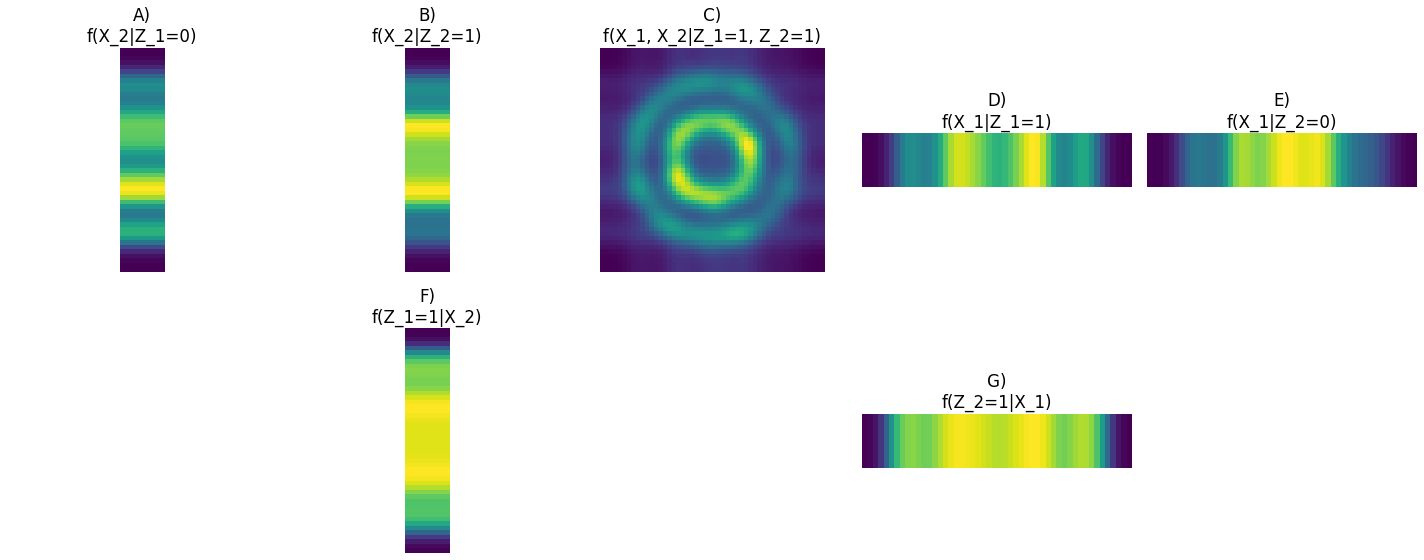

In [3]:
num_samples=1000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=100
methods=["side_spaces"]
dataset = 'circles'

h = .2


# (1) Create toy and ground truth data
X, Xgt, _, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=True)

from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_1, hat_f_2, hat_f_z1_knowing_x2_bar, hat_f_z2_knowing_x1_bar = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=50, verbose=1)

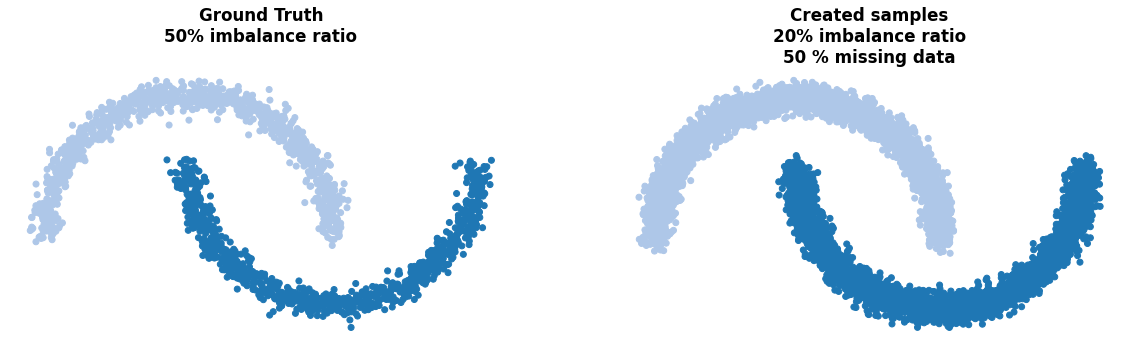

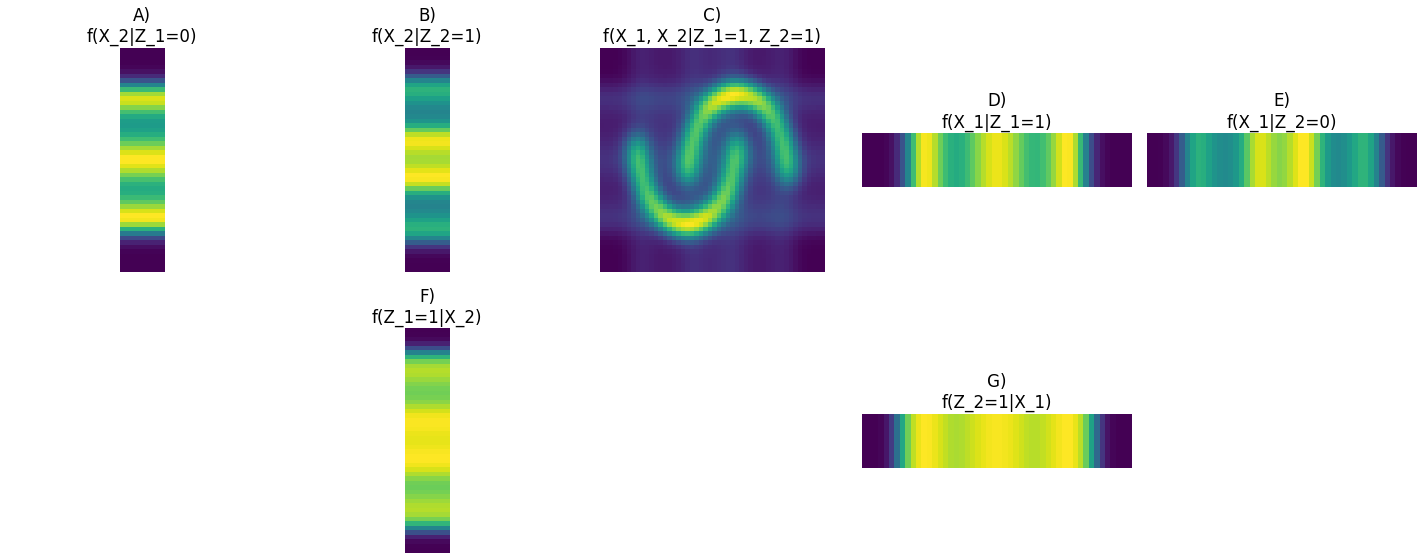

In [5]:
num_samples=1000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=100
methods=["side_spaces"]
dataset = 'moons'

h = .2


# (1) Create toy and ground truth data
X, Xgt, _, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=True)

hat_f, hat_f_1, hat_f_2, hat_f_z1_knowing_x2_bar, hat_f_z2_knowing_x1_bar = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=50, verbose=1)

**Interpretation:**

How to read those ? C) is TODO
F) shows the probability that x is missing depending on where you are on the y feature space. G is the same for y depending on where you are on the x coordinate. 



**Conclusion on the method:**
    
    
1) The patterns of the side distributions are interesting. We can see that it reveals where in the 2D feature space there is a higher chance of having missing variables, which is associated with a MAR or MNAR missingness mechanisms. For instance we see in the two plots above that it is not uniformly distributed in the regions populated by each classes. This provide some cues when a variable is missing: If $x_1$ is missing for instance, and $x_2$ is known (let's say $x_2=.5$), then we  can state that it is more likely than $x_1$ were on some regions...

2) The conditional distributions and the marginals are different, which is interesting. It certainly depends on the missingness mechanism, but at least in here it shows that when trying to infer the likelihood of a sample knowing the estimated distributions, we should take the conditional one (built with the same missingness state, e.g. first coordinate missing), rather than using the marginal. If the two are different, e.g. in some region of the feature space of X_1, the density of F(X_1|X_2 missing) is higher than f(X_1), then it means that knowing that X_2 is missing for a certain sample increases the likelihood that X_1 i in this region. Or that the distribution of Z_1 is higher in this region... IMPORTANT ! At the extreme, if there is a region of the feaure space of X_1 that is unexplored when X_2 is known, but explored when X_2 is unknown (hence a difference between the marginal and the conditional), then it means that Z_2 depends on X_1 (MAR or MNAR). On the contrary if both are identical, it seems reasonable to say that Z_2 is independant from X_1. If not independant, then at a time of inference, knowing the value of X_1 can help predict whether X_2 will be missing. Or if X_1 and X_2 are missing, probably we can infer the value of X_1 using the ..

2) There seem to be an artifact due to the cartesian grid. What if the coordinates used were polar for this example ?  

3) Future work: we can include the diagnosis Y.

4) We can see whether using a classifier on the Z variable would work, in the cases of MCAR, MAR or MNAR mechanisms.


#### Functions

In [201]:
def kernel_based_pdf_estimation_xz(X, h=.2, resolution=50, cmap='Blues', verbose=0):
    
    from utils import estimate_pdf

    # Estimation of f(X_1,X_2|Z_1=1, Z_2=1), f(X_2|Z_1=0,Z_2=1) and f(X_1|Z_1=1,Z_2=0)
    hat_f, hat_f_1, hat_f_2 = estimate_pdf(data=X, method='side_spaces', resolution=resolution, bandwidth=h) 
    
    # Normalization of the distributions
    hat_f /= hat_f.sum();hat_f_1 /= hat_f_1.sum();hat_f_2 /= hat_f_2.sum()
    
    # Computation of the marginals
    hat_f_marginal_1 = hat_f.sum(axis=1);hat_f_marginal_2 = hat_f.sum(axis=0)
    
    # Z_prior reflects P(Z_1=1, Z_2=1, ... Z_k=1)
    Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])

    # Estimation of f(Z_1=1|X_2)
    #hat_f_z1_knowing_x2 = hat_f_2 * (1-Z_prior[0])/(hat_f_2*(1-Z_prior[0]) + hat_f_marginal_2*Z_prior[0])
    #hat_f_z1_knowing_x2 /= hat_f_z1_knowing_x2.sum()
    
    # Estimation of f(Z_1=0|X_2)
    hat_f_z1_knowing_x2_bar = hat_f_marginal_2 * Z_prior[0]/(hat_f_marginal_2*Z_prior[0] + hat_f_2*(1-Z_prior[0]))
    hat_f_z1_knowing_x2_bar /= hat_f_z1_knowing_x2_bar.sum()
    
    # Estimation of f(Z_2=1|X_1)
    #hat_f_z2_knowing_x1 = hat_f_1 * (1-Z_prior[1])/(hat_f_1*(1-Z_prior[1]) + hat_f_marginal_1*Z_prior[1])
    #hat_f_z2_knowing_x1 /= hat_f_z2_knowing_x1.sum()
    
    # Estimation of f(Z_2=0|X_1)
    hat_f_z2_knowing_x1_bar = hat_f_marginal_1 * Z_prior[1]/(hat_f_marginal_1*Z_prior[1] + hat_f_1*(1-Z_prior[1]))
    hat_f_z2_knowing_x1_bar /= hat_f_z2_knowing_x1_bar.sum()


    if verbose:

        fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()
        axes[0].imshow(hat_f_2[:,None].repeat(2, axis=1), cmap=cmap);axes[0].set_title("A)\nf(X_2|Z_1=0)")
        axes[1].imshow(hat_f_marginal_2[:,None].repeat(2, axis=1), cmap=cmap);axes[1].set_title("B)\nf(X_2|Z_2=1)")
        axes[2].imshow(hat_f, cmap=cmap);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
        axes[3].imshow(hat_f_marginal_1[None, :].repeat(2, axis=0), cmap=cmap);axes[3].set_title("D)\nf(X_1|Z_1=1)")
        axes[4].imshow(hat_f_1[None, :].repeat(2, axis=0), cmap=cmap);axes[4].set_title("E)\nf(X_1|Z_2=0)")
        
        #axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
        axes[6].imshow(hat_f_z1_knowing_x2_bar[:,None].repeat(2, axis=1), cmap=cmap);axes[6].set_title("F)\nf(Z_1=1|X_2)")
        axes[8].imshow(hat_f_z2_knowing_x1_bar[None, :].repeat(2, axis=0), cmap=cmap);axes[8].set_title("G)\nf(Z_2=1|X_1)")
        #axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")
        
        _ = [ax.axis('off') for ax in axes]; plt.tight_layout()
        
    return hat_f, hat_f_1, hat_f_2, hat_f_z1_knowing_x2_bar, hat_f_z2_knowing_x1_bar, hat_f_marginal_2, hat_f_marginal_1


##############################################################################
####### Kernel_based_pdf_estimation using the side spaces            #########
##############################################################################


def kernel_based_pdf_estimation_side_spaces(X, x=None, h=.2, verbose=0):
    """
    Estimate the pdf distribution of "X" at "x" using the set of observations X[i,:]. x has lenght k (the dimension of the problem), X has shape nxk (n observations of dimension k). 
    X can have missing values which should be filled with np.nan. A Kernel approximation is computed when the coordinates of the observations are know. 
    If a coordinate is unknown, the contribution of this term is replaced by a prior on the missingness distribution of that coordinate, computed from all the other samples. *The contribution is limited to the range of values, based on the rest of the dataset.*
    
    Example: 
    X = np.random.random((10,3))  # 10 Observations of a 3d problem
    X[0,1] = np.nan; X[4,2] = np.nan  # We don't know some entries. 
    h = .1  # bandwidth of the gaussian kernel
    x = [0.1, 0.1, 0.1]  # where we want to evaluate the pdf (in the 3d space)
    pdf_x = kernel_based_pdf_estimation_z_prior_limited_range(X,x=x,h=h,verbose=0)
    print('The prob at {} is {}.format(x,pdf_x))

    """

    hat_f, hat_f_1, hat_f_2 = F_side_spaces(X=X, x=x, h=h)
    return hat_f, hat_f_1, hat_f_2


#@jit(nopython=True, parallel=True)
def F_side_spaces(X=None, x=None, h=.2, verbose=0):
    """
    Computation of the pdf at x, using the prior on the missingness meachanism of each features. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    # number "training" samples 
    n = X.shape[0]      

    # init 
    hat_f = []
    hat_f_1 = []  
    hat_f_2 = []  

    # Compute contribution of each samples to the estimation of the pdf at point x 
    for X_i in X:
        contribution_f, contribution_f_1, contribution_f_2 = f_xi_side_spaces(X_i, x, h)
        hat_f.append(contribution_f)
        hat_f_1.append(contribution_f_1)
        hat_f_2.append(contribution_f_2)

    hat_f = np.mean(np.array(hat_f))      
    hat_f_1 = np.mean(np.array(hat_f_1))      
    hat_f_2 = np.mean(np.array(hat_f_2))      
    return hat_f, hat_f_1, hat_f_2

#@jit(nopython=True, parallel=True)
def f_xi_side_spaces(X_i, x, h):
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = X_i.shape[0]  # dimension of the space of samples. 
    K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel
    # Define the switch function between coordiantes. It is needed as if X1 is missing, we need to build the distribution of x_2 knowing xi is missing, so the other line...
    # The switch function in general should send 0 to 1 and 1 to 0 in 2D. In 3D, 0 should be sent to [1,2], 1 to [0,2] and 2 to [0,1].
    switch = lambda j: -j+1

    # Since we are using a isomorph kernel, each axis can be handeled independently. 
    hat_fi = 1
    hat_fi_missing = [1, 1]

    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/h * K( (x[j]-X_i[j])/h )
        if coords_missing[j]:  # we don't know the j-th coordinate, 
            # We use prior on the missingness mechanism associated to this coordinates.
            hat_fi_missing[switch(j)] *= 1/h * K( (x[switch(j)]-X_i[switch(j)])/h ) # To check

    return hat_fi, hat_fi_missing[0], hat_fi_missing[1]


## Taking the class Y into account


Now that the estimation of the different distributions, for X and Z are more or less optimal, we can investigate how to use them at the time of prediction.

**We hope that the missingness can be useful to recover some information about the diagnosis, or investigate a way to quantify the certainty/uncertainty of the prediction taking into account the missing vraiables.**


Notes:

- $f_{X_1,X_2|Y}$ is estimated using Matias' data imputation scheme. $f_{X_1|Z_2=0, Y}$ and $f_{X_2|Z_1=0, Y}$ are computed using vanilla kernel based estimation. The missingness distributions $f_{Z_2=0|X_1, Y}$ and $f_{Z_1=0|X_2,Y }$ are estimated based on the Bayes' theorem. 
- We now need to build those distributions **for each class**, hence adding the "knowing $Y$" in the definition of the distributions.

Process:
- We first construct the distributions mentioned above.
- We then classify a test set using all the available information, using maximum likelihood estimation. 

**Estimation of the distributions**

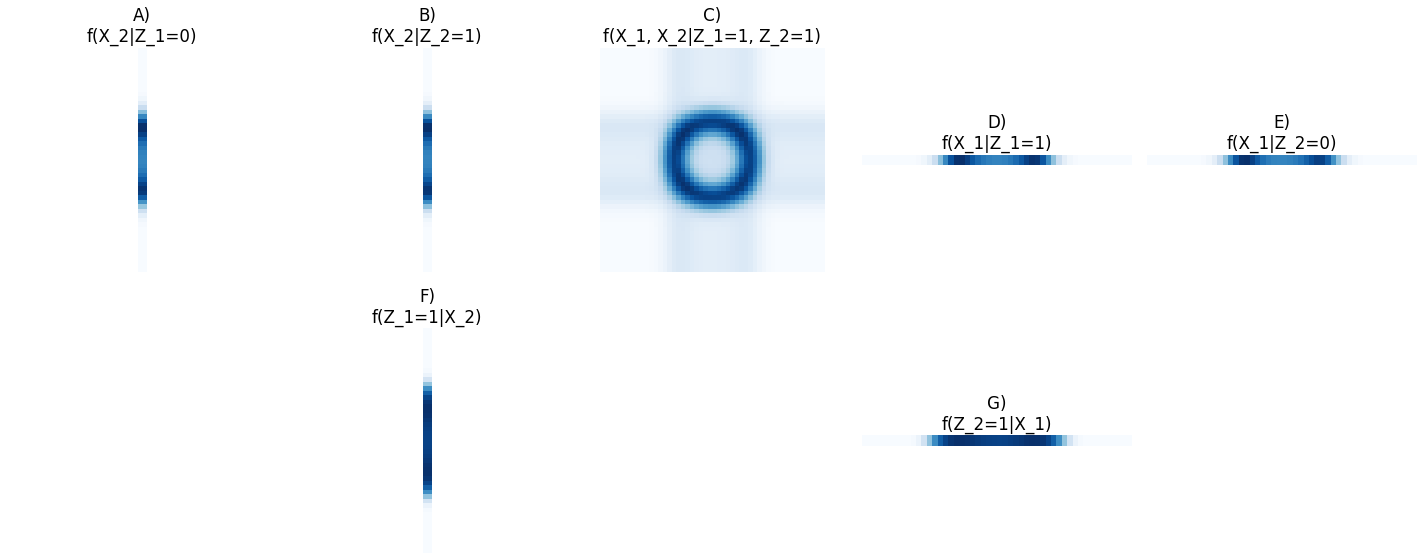

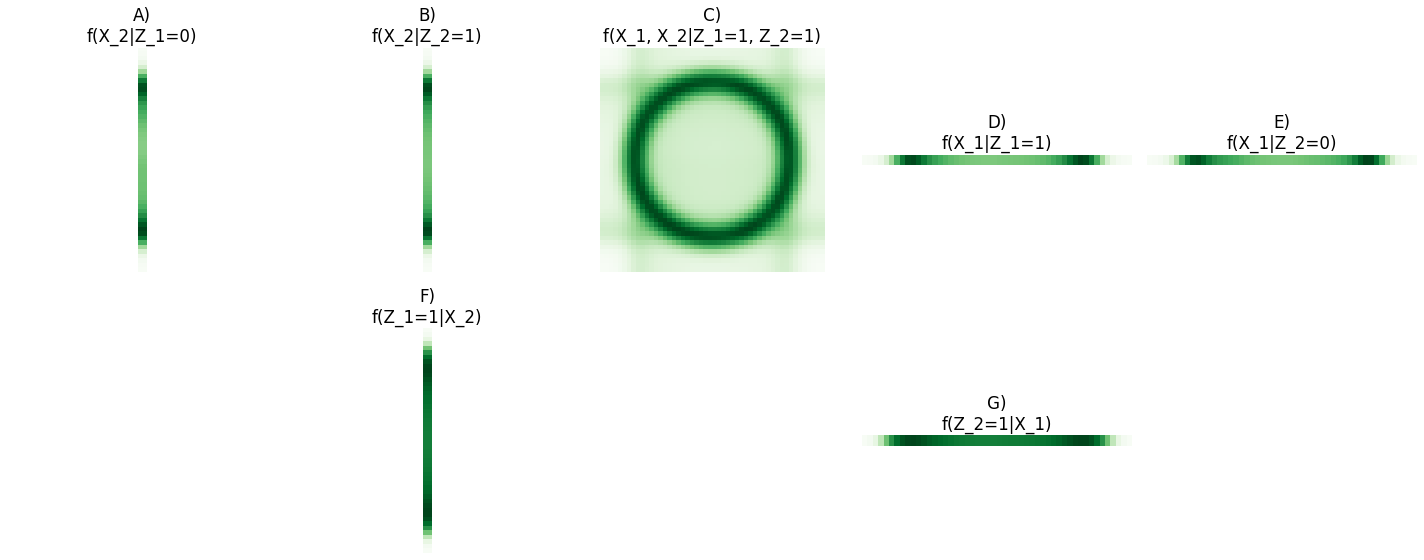

In [215]:
num_samples=100000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=50
methods=["side_spaces"]
dataset = 'circles'

h = .2

#################################################################
# (1) Create toy and ground truth data
#################################################################
X, _, Y, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=False)

#################################################################
# (2) Separate between training and test set 
#################################################################

proportion_train  = .8

X_train, X_test = X[:int(proportion_train*X.shape[0])], X[int(proportion_train*X.shape[0]):]
Y_train, Y_test = Y[:int(proportion_train*X.shape[0])], Y[int(proportion_train*X.shape[0]):]

X_train_pos, X_train_neg = X_train[Y_train==1], X_train[Y_train==0]

#################################################################
# (3) Estimation of the different distributions
#################################################################

hat_f_pos, hat_f_1_pos, hat_f_2_pos, hat_f_z1_knowing_x2_pos, hat_f_z2_knowing_x1_pos, hat_f_marginal_2_pos, hat_f_marginal_1_pos = kernel_based_pdf_estimation_xz(X=X_train_pos, h=h, resolution=resolution, cmap='Blues', verbose=1)
hat_f_neg, hat_f_1_neg, hat_f_2_neg, hat_f_z1_knowing_x2_neg, hat_f_z2_knowing_x1_neg, hat_f_marginal_2_neg, hat_f_marginal_1_neg = kernel_based_pdf_estimation_xz(X=X_train_neg, h=h, resolution=resolution, cmap='Greens',verbose=1)



Sanity check: num prediction: 200 == 200: Num samples

Sample: 99 positive and 101 negative samples (#p/#n= 98%)
Accuracy: 96.5%
F1 score (2 PPVxTPR/(PPV+TPR)): 96.6%
Matthews correlation coefficient (MCC): 93.2%
Sensitivity, recall, hit rate, or true positive rate (TPR): 100.0%
Specificity, selectivity or true negative rate (TNR): 93.1%
Precision or positive predictive value (PPV): 93.4%
Negative predictive value (NPV): 100.0%
Miss rate or false negative rate (FNR): 0.0%
False discovery rate (FDR=1-PPV): 6.6%
False omission rate (FOR=1-NPV): 0.0%


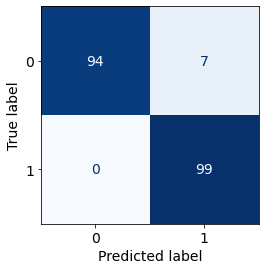

In [204]:
#################################################################
# (4) Prediction using maximum likelihood estimation
#################################################################

_, step = np.linspace(-2.5,2.5,resolution, retstep=True)

# Contains for each sample of the Test set, the corresponding x and y index coordinates, in the matrix of the 2D pdf... 
coord_to_index = np.floor_divide(X_test+2.5, step)


# Init. the array of prediction
predictions = np.zeros(shape=Y_test.shape[0]); arr = []



#----------- Treat the case of when both coordinates are known


# Index of the samples in the test set where both first coordinates are known 
X_indexes_both_known = np.argwhere((~np.isnan(coord_to_index)).sum(axis=1)==2).squeeze(); arr.extend(X_indexes_both_known)

# Coordinates of indexes in the feature space of the samples in the test set where both first coordinates are known 
hat_f_coordinates = coord_to_index[X_indexes_both_known].astype(int)
inds_array = np.moveaxis(np.array(list(map(tuple, hat_f_coordinates))), -1, 0)

# Compare likelihood to do the prediction
predictions_both_known = (hat_f_pos[tuple(inds_array)] > hat_f_neg[tuple(inds_array)]).astype(int)

# Assign predictions 
predictions[X_indexes_both_known] = predictions_both_known

#----------- Treat the case of when only the first coordinate is known

# Index of the samples in the test set where only the first coordinate is known 
X_indexes_first_known = np.argwhere(~np.isnan(coord_to_index[:,0]) & np.isnan(coord_to_index[:,1])).squeeze(); arr.extend(X_indexes_first_known)

# Coordinates of index in the feature space of the samples in the test set where only the first coordinate is known 
hat_f_coordinates = coord_to_index[X_indexes_first_known][:,0].astype(int)

# Compare likelihood to do the prediction
predictions_first_known = (hat_f_1_pos[hat_f_coordinates] > hat_f_1_neg[hat_f_coordinates]).astype(int)

# Assign predictions 
predictions[X_indexes_first_known] = predictions_first_known


#----------- Treat the case of when only the second coordinate is known


# Index of the samples in the test set where only the first coordinate is known 
X_indexes_second_known = np.argwhere(np.isnan(coord_to_index[:,0]) & ~np.isnan(coord_to_index[:,1])).squeeze(); arr.extend(X_indexes_second_known)

# Coordinates of index in the feature space of the samples in the test set where only the first coordinate is known 
hat_f_coordinates = coord_to_index[X_indexes_second_known][:,1].astype(int)

# Compare likelihood to do the prediction
predictions_second_known = (hat_f_2_pos[hat_f_coordinates] > hat_f_2_neg[hat_f_coordinates]).astype(int)

# Assign predictions 
predictions[X_indexes_second_known] = predictions_second_known

print("Sanity check: num prediction: {} == {}: Num samples\n".format(len(arr), Y_test.shape[0]))

# Creation of a df for the results

df = pd.DataFrame({'X1':X_test[:,0], 
                  'X2':X_test[:,1], 
                  'Z1':[1 if not np.isnan(x) else 0 for x in X_test[:,0]],
                  'Z2': [1 if not np.isnan(x) else 0 for x in X_test[:,1]],
                  'Y': Y_test, 
                  'Prediction': predictions, 
                  'True Positive': [1 if y_true==1 and y_pred==1 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  'True Negative': [1 if y_true==0 and y_pred==0 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  'False Positive': [1 if y_true==0 and y_pred==1 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  'False Negative': [1 if y_true==1 and y_pred==0 else 0 for (y_true, y_pred) in zip(Y_test, predictions)], 
                  })
my_classification_report(Y_test, predictions)

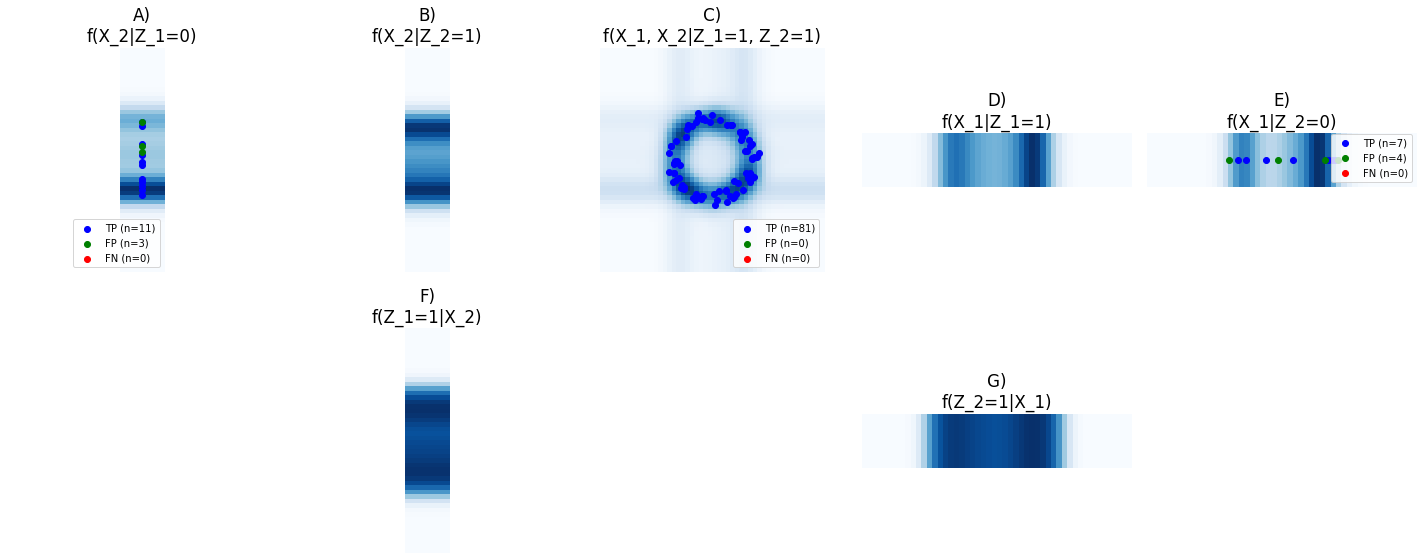

In [211]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()

axes[0].imshow(hat_f_2_pos[:,None].repeat(2, axis=1), cmap='Blues', extent=[-.5, .5, -2.5, 2.5]);axes[0].set_title("A)\nf(X_2|Z_1=0)")
axes[1].imshow(hat_f_marginal_2_pos[:,None].repeat(2, axis=1), cmap='Blues', extent=[-.5, .5, -2.5, 2.5]);axes[1].set_title("B)\nf(X_2|Z_2=1)")
axes[2].imshow(hat_f_pos, cmap='Blues', extent=[-2.5, 2.5, -2.5, 2.5]);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
axes[3].imshow(hat_f_marginal_1_pos[None, :].repeat(2, axis=0), cmap='Blues', extent=[-2.5, 2.5, -.5, .5]);axes[3].set_title("D)\nf(X_1|Z_1=1)")
axes[4].imshow(hat_f_1_pos[None, :].repeat(2, axis=0), cmap='Blues', extent=[-2.5, 2.5, -.5, .5]);axes[4].set_title("E)\nf(X_1|Z_2=0)")
#axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
axes[6].imshow(hat_f_z1_knowing_x2_pos[:,None].repeat(2, axis=1), cmap='Blues', extent=[ -.5, .5,-2.5, 2.5]);axes[6].set_title("F)\nf(Z_1=1|X_2)")
axes[8].imshow(hat_f_z2_knowing_x1_pos[None, :].repeat(2, axis=0), cmap='Blues', extent=[-2.5, 2.5, -.5, .5]);axes[8].set_title("G)\nf(Z_2=1|X_1)")
#axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")


# plot on the A) plot the sample having only X2 
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `True Positive`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `True Positive`==1")['X2'], 
                color='b', label="TP (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `True Positive`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")['X2'], 
            color='g', label="FP (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")),  
                df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")['X2'], 
                color='r', label="FN (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1"))))


axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `True Positive`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `True Positive`==1")['X2'], 
                color='b', label="TP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `True Positive`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X2'], 
               color='g', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X1'],  
                df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X2'], 
                color='r', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1"))))

axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `True Positive`==1")['X1'],
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `True Positive`==1")),  
                color='b', label="TP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `True Positive`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")),
                color='g', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")),  
                color='r', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1"))))

_ = [ax.legend(prop={'size':10}, loc='lower right') for i,ax in enumerate(axes) if i in [0, 2, 4]]; [ax.axis('off') for ax in axes]; plt.tight_layout()


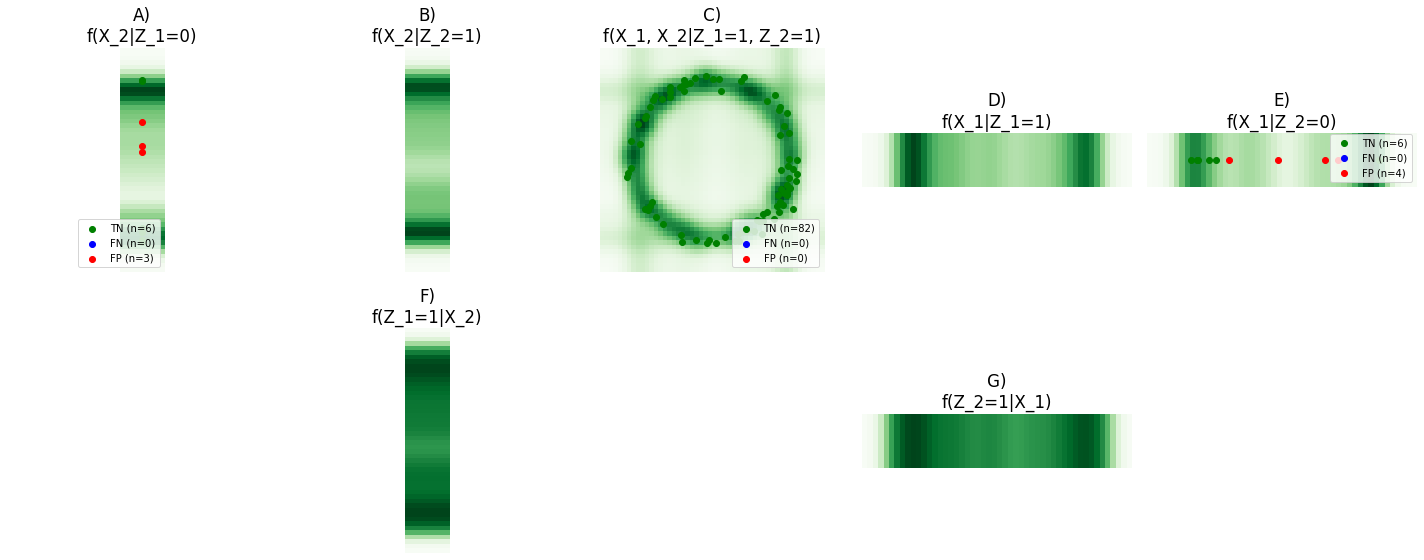

In [212]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()

axes[0].imshow(hat_f_2_neg[:,None].repeat(2, axis=1), cmap='Greens', extent=[-.5, .5, -2.5, 2.5]);axes[0].set_title("A)\nf(X_2|Z_1=0)")
axes[1].imshow(hat_f_marginal_2_neg[:,None].repeat(2, axis=1), cmap='Greens', extent=[-.5, .5, -2.5, 2.5]);axes[1].set_title("B)\nf(X_2|Z_2=1)")
axes[2].imshow(hat_f_neg, cmap='Greens', extent=[-2.5, 2.5, -2.5, 2.5]);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
axes[3].imshow(hat_f_marginal_1_neg[None, :].repeat(2, axis=0), cmap='Greens', extent=[-2.5, 2.5, -.5, .5]);axes[3].set_title("D)\nf(X_1|Z_1=1)")
axes[4].imshow(hat_f_1_neg[None, :].repeat(2, axis=0), cmap='Greens', extent=[-2.5, 2.5, -.5, .5]);axes[4].set_title("E)\nf(X_1|Z_2=0)")
#axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
axes[6].imshow(hat_f_z1_knowing_x2_neg[:,None].repeat(2, axis=1), cmap='Greens', extent=[ -.5, .5,-2.5, 2.5]);axes[6].set_title("F)\nf(Z_1=1|X_2)")
axes[8].imshow(hat_f_z2_knowing_x1_neg[None, :].repeat(2, axis=0), cmap='Greens', extent=[-2.5, 2.5, -.5, .5]);axes[8].set_title("G)\nf(Z_2=1|X_1)")
#axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")


# plot on the A) plot the sample having only X2 
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `True Negative`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `True Negative`==1")['X2'], 
                color='g', label="TN (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `True Negative`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")), 
                df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1")['X2'], 
            color='b', label="FN (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Negative`==1"))))
axes[0].scatter([0]*len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")),  
                df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1")['X2'], 
                color='r', label="FP (n={})".format(len(df.query(" `Z1`==0 and  `Z2`==1 and `False Positive`==1"))))


axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `True Negative`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `True Negative`==1")['X2'], 
                color='g', label="TN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `True Negative`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X1'], 
                df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1")['X2'], 
               color='b', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Negative`==1"))))
axes[2].scatter(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X1'],  
                df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1")['X2'], 
                color='r', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==1 and `False Positive`==1"))))

axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `True Negative`==1")['X1'],
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `True Negative`==1")),  
                color='g', label="TN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `True Negative`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1")),
                color='b', label="FN (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Negative`==1"))))
axes[4].scatter(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")['X1'], 
                [0]*len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1")),  
                color='r', label="FP (n={})".format(len(df.query(" `Z1`==1 and  `Z2`==0 and `False Positive`==1"))))

_ = [ax.legend(prop={'size':10}, loc='lower right') for i,ax in enumerate(axes) if i in [0, 2, 4]]; [ax.axis('off') for ax in axes]; plt.tight_layout()


In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)


**Conclusion on the method:**
    
    1) TODO

#### Functions

In [200]:
def my_classification_report(y_true, y_pred):
    """
    Print several performance metrics that are common in the context of screening and fraud detection.
    """    

    """
    First compute the TP, FP, TN and FN from which most metrics derive
    """
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    """
    Compute metrics of interest  
    """    
    print('Sample: {} positive and {} negative samples (#p/#n={:3.0f}%)'.format(tp+fn, tn+fp, 100*(tp+fn)/(tn+fp)))
    acc = (tp + tn) / (tp + tn + fp +  fn)
    print('Accuracy: {:3.1f}%'.format(100*acc))
    f1 = 2*tp / (2*tp + fp + fn)
    print('F1 score (2 PPVxTPR/(PPV+TPR)): {:3.1f}%'.format(100*f1))
    mcc = (tp*tn - fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('Matthews correlation coefficient (MCC): {:3.1f}%'.format(100*mcc))
    tpr =  tp / (tp+fn)
    print('Sensitivity, recall, hit rate, or true positive rate (TPR): {:3.1f}%'.format(100*tpr))
    tnr = tn / (tn+fp)
    print('Specificity, selectivity or true negative rate (TNR): {:3.1f}%'.format(100*tnr))
    ppv = tp / (tp+fp)
    print('Precision or positive predictive value (PPV): {:3.1f}%'.format(100*ppv))
    npv = tn / (tn+fn)
    print('Negative predictive value (NPV): {:3.1f}%'.format(100*npv))
    fnr = fn / (tp+fn)
    print('Miss rate or false negative rate (FNR): {:3.1f}%'.format(100*fnr))
    print('False discovery rate (FDR=1-PPV): {:3.1f}%'.format(100*(1-ppv)))
    print('False omission rate (FOR=1-NPV): {:3.1f}%'.format(100*(1-npv)))
    cm = confusion_matrix(Y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    disp.im_.colorbar.remove()
    plt.show()
    return 


## Remaining questions

- How to build a confidece interval for the estimation, potentially using the missing data ? (The more data the higher the confidence) 
- How to be able to characterize easily the missingness mechanism at stake ? 

hat_f_z is of dimention (20, 20)
hat_f_z_1 is of dimention (20, 1)
hat_f_z_2 is of dimention (1, 20)


NameError: name 'data' is not defined

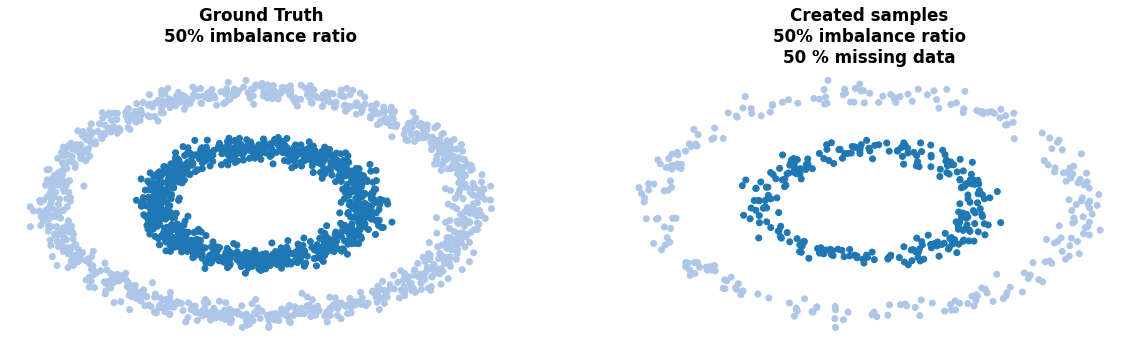

In [158]:
kernel_bandwidth=.2
num_samples=1000
ratio_of_missing_values=.5
imbalance_ratio=.5
resolution=50
dataset = 'moon'
from utils import estimate_pdf
methods=["side_spaces"]
dataset = 'circles'



h = kernel_bandwidth

# (1) Create toy and ground truth data
X, Xgt, _, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=True)
resolution=20
bandwidth=.2

xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f_z = np.zeros_like(xygrid[0])  # init. the pdf estimation
hat_f_z_1 = np.zeros((xygrid[0].shape[0], 1))  # init. the pdf estimation
hat_f_z_2 = np.zeros((1, xygrid[0].shape[0]))  # init. the pdf estimation

print("hat_f_z is of dimention {}".format(hat_f_z.shape))
print("hat_f_z_1 is of dimention {}".format(hat_f_z_1.shape))
print("hat_f_z_2 is of dimention {}".format(hat_f_z_2.shape))

for i in range(H):
    for j in range(W):
        x = xygrid[0][i,j]
        y = xygrid[1][i,j]
        hat_f_z[i,j], hat_f_z_1[i,j], hat_f_z_2[i,j] =  kernel_based_pdf_estimation_side_spaces_z(X=X, x=[x,y], h=h)

# Average the contribution of all j's coordinate on this horizontal line
hat_f_z_1 = np.mean(hat_f_z_1, axis=0)

# Average the contribution of all i's coordinate to form the vertical line
hat_f_2 = np.mean(hat_f_z_2, axis=1)   



# Suite

- https://github.com/ResidentMario/missingno 


### What if the prediction sample has missing values?

We focus previously on dealing with missing values on the data available to estimate the pdf ($X_i$). Sometimes, we want to estimate the probability of an observed sample with values $u$, but some of the coordinates could be missing. Think for example, that you have the PDF to estimate the probability of the salary of a person based on their educations, years of experience, and age; but for some reason, the age is missing. 

As in {eq}`eq:kernel_estimation_mdim2` we use the $j$ subindex to denote the coordinate, $u=\{u_j\}$ with $j=1,...,k$ (as before, we are working on a $k$-dimensional feature space). Let us define the set $N = [j_1, ..., j_p]$ the set of coordinates for which $u$ is known. When we know all the coordinates, we are essentially estimating the density distribution associated with a point in the k-dimensional feature space. If we don't know one axis, we can think as estimating the density along a line (associated to all the point that share the known axis). If we don't know two coordinates we are estimating the density associated with a 2D plane and so on. In general, the density associated with the hyperplane of unknown coordinates can be estimated as:

$$
\hat{f}_N(u) = \int_{u_j j\notin N} \hat{f}(u) =  \int_{u_j j\notin N} \frac 1 n \sum_i \prod_j f_{ij}(u).
$$(eq:kernel_estimation_missing_values)

Using the definition $f_{ij}(u)$ introduces in {eq}`eq:fij_unknown_j`, and standard properties of calculus, we have, 
 
$$
\hat{f}_N(u) = \int_{u_j j\notin N} \frac 1 n \sum_i \prod_j f_{ij}(u) = \frac 1 n \sum_i \prod_{j \in N} f_{ij}(u) \prod_{j \notin N} \int_{-\infty}^{+\infty} \frac{1}{h\sqrt{2\pi}} e^{-\frac{1}{2 h^2} (u_j-X_{ij})^2} du_{j} = \frac 1 n \sum_i \prod_{j \in N} f_{ij}(u). $$(eq:kernel_estimation_missing_values2)

Equation {eq}`eq:kernel_estimation_missing_values2` proves that restricting the prediction to a subset of features, is as simple as computing the pdf restricting the training data to only those known features. As we show, the mathetical interpretation is that we will be estimating the density in a hyperplance of the feature space rather than a single point. 